In [2]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55.0,170.0,80.0,92.0,1.2,0.8,1.0,1.0,129.0,74.0,82.0,175.0,58.0,49.0,114.0,15.4,1.0,0.9,20.0,23.0,13.0,0.0,0.0
1,1,30.0,170.0,80.0,94.0,1.5,1.5,1.0,1.0,128.0,84.0,95.0,188.0,128.0,51.0,111.0,16.2,1.0,0.9,30.0,39.0,92.0,0.0,1.0
2,2,45.0,170.0,75.0,84.0,1.0,1.0,1.0,1.0,124.0,80.0,98.0,192.0,138.0,52.0,112.0,14.6,2.0,0.9,20.0,20.0,50.0,0.0,1.0
3,3,55.0,150.0,55.0,85.0,0.9,0.5,1.0,1.0,123.0,79.0,95.0,193.0,65.0,61.0,119.0,13.4,1.0,0.8,25.0,20.0,18.0,0.0,0.0
4,4,45.0,160.0,55.0,72.0,0.5,0.6,1.0,1.0,117.0,76.0,103.0,197.0,81.0,61.0,120.0,13.9,1.0,0.7,20.0,26.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,40.0,170.0,70.0,81.0,1.0,1.0,1.0,1.0,130.0,79.0,91.0,181.0,133.0,47.0,106.0,15.8,1.0,0.9,19.0,20.0,25.0,1.0,1.0
14996,14996,40.0,155.0,50.0,75.0,1.0,1.2,1.0,1.0,100.0,60.0,83.0,169.0,59.0,51.0,106.0,14.1,1.0,0.8,22.0,17.0,20.0,0.0,0.0
14997,14997,45.0,160.0,55.0,81.0,1.2,0.8,1.0,1.0,100.0,60.0,91.0,150.0,68.0,39.0,97.0,16.2,1.0,0.9,25.0,20.0,30.0,0.0,0.0
14998,14998,50.0,160.0,60.0,80.0,0.7,1.0,1.0,1.0,120.0,80.0,90.0,258.0,97.0,88.0,151.0,14.5,1.0,0.9,19.0,13.0,11.0,0.0,0.0


In [4]:
df_test = pd.read_csv('test.csv')
pd.set_option('display.max_columns', None)
df_test

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,15000,40.0,175.0,70.0,84.0,1.5,1.5,1.0,1.0,120.0,59.0,100.0,179.0,122.0,45.0,109.0,16.0,1.0,1.0,15.0,9.0,25.0,0.0
1,15001,45.0,155.0,55.0,72.4,0.6,0.5,1.0,1.0,102.0,68.0,87.0,186.0,104.0,56.0,109.0,11.5,1.0,0.8,14.0,10.0,13.0,0.0
2,15002,40.0,160.0,55.0,76.0,1.2,1.2,1.0,1.0,115.0,64.0,93.0,167.0,84.0,77.0,74.0,13.3,1.0,0.8,14.0,10.0,11.0,0.0
3,15003,45.0,150.0,50.0,74.4,1.0,1.0,1.0,1.0,96.0,67.0,72.0,179.0,63.0,85.0,82.0,13.4,1.0,0.7,23.0,15.0,18.0,0.0
4,15004,35.0,185.0,80.0,90.0,0.8,1.0,1.0,1.0,113.0,73.0,82.0,183.0,89.0,59.0,105.0,15.6,1.0,0.9,16.0,26.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,25.0,170.0,70.0,85.0,0.6,0.7,1.0,1.0,106.0,63.0,93.0,178.0,50.0,60.0,108.0,14.9,1.0,1.0,23.0,16.0,22.0,0.0
9996,24996,55.0,175.0,70.0,85.0,0.7,1.2,1.0,1.0,138.0,80.0,94.0,162.0,171.0,54.0,73.0,16.3,1.0,0.9,13.0,8.0,18.0,0.0
9997,24997,45.0,155.0,50.0,74.6,0.5,0.4,1.0,1.0,106.0,60.0,95.0,169.0,163.0,52.0,84.0,14.4,1.0,0.9,20.0,16.0,26.0,0.0
9998,24998,45.0,160.0,55.0,74.0,1.0,1.2,1.0,1.0,107.0,70.0,89.0,219.0,52.0,92.0,118.0,12.2,1.0,0.8,17.0,9.0,11.0,0.0


In [5]:
X = df.drop(columns=['smoking'])
y = df['smoking']

[I 2024-10-25 18:40:59,832] A new study created in memory with name: no-name-d8629f64-3e12-46dd-90e3-0cd0ff285df6


[I 2024-10-25 18:41:08,608] Trial 0 finished with value: 0.8879568092122123 and parameters: {'n_estimators': 247, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8879568092122123.
[I 2024-10-25 18:41:15,488] Trial 1 finished with value: 0.886622758310411 and parameters: {'n_estimators': 233, 'max_depth': 16, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.8879568092122123.
[I 2024-10-25 18:41:21,231] Trial 2 finished with value: 0.8830031189550077 and parameters: {'n_estimators': 231, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8879568092122123.
[I 2024-10-25 18:41:39,441] Trial 3 finished with value: 0.8829765423450822 and parameters: {'n_estimators': 139, 'max_depth': 21, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 0 with value: 0.88795680921221

Best parameters found by Optuna: {'n_estimators': 247, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Best AUC score achieved: 0.8879568092122123
Final Model Accuracy: 0.7996666666666666
Final Model ROC AUC Score: 0.8803203050994819


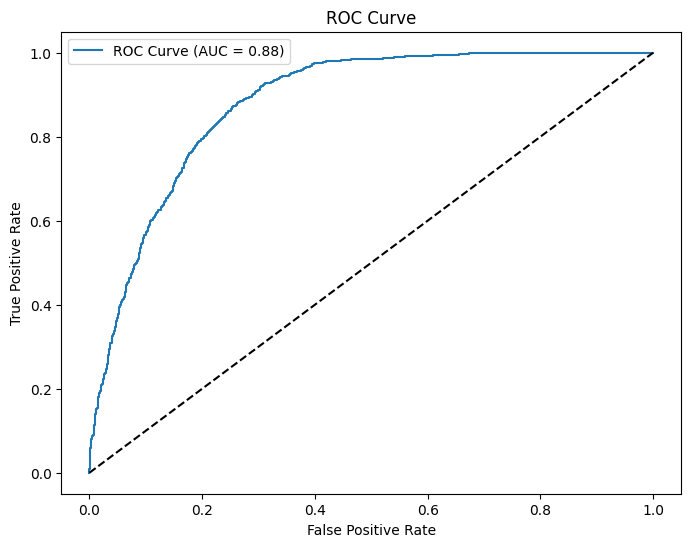

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import optuna

# Feature va target ustunlarini ajratish
X = df.drop('smoking', axis=1)  
y = df['smoking']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optuna funksiyasi
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    y_prob = rf_model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    return auc_score  

# Optuna orqali hyperparameter tuning
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
best_params = study.best_params
print("Best parameters found by Optuna:", best_params)
print("Best AUC score achieved:", study.best_value)

# Eng yaxshi parametrlar bilan RandomForest modelini yaratish
rf_model = RandomForestClassifier(**best_params, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Maxsus parametrlar bilan boshqa model

voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('dt', dt_model)],
    voting='soft'
)

# Ansambl modelni o'rgatish
voting_clf.fit(X_train, y_train)

# Test ma'lumotlarida bashorat qilish
y_pred = voting_clf.predict(X_test)
y_prob = voting_clf.predict_proba(X_test)[:, 1]

# Aniqlik va ROC AUC ko'rsatkichlari
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("Final Model Accuracy:", accuracy)
print("Final Model ROC AUC Score:", auc_score)

# ROC chizig'ini chizish
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Test ma'lumotlarida final bashoratlar va CSV yaratish
y_test_prob = voting_clf.predict_proba(df_test)[:, 1]

subm = pd.read_csv("sample_submission.csv")
subm['smoking'] = y_test_prob
subm.to_csv("7_urinish.csv", index=False)


[I 2024-10-25 18:43:41,700] A new study created in memory with name: no-name-8c86c422-092d-4310-8cdf-8c8dd945d0fa


[I 2024-10-25 18:43:46,922] Trial 0 finished with value: 0.8834259718022168 and parameters: {'n_estimators': 218, 'max_depth': 26, 'min_samples_split': 12, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8834259718022168.
[I 2024-10-25 18:43:55,121] Trial 1 finished with value: 0.8835370240651204 and parameters: {'n_estimators': 77, 'max_depth': 28, 'min_samples_split': 16, 'min_samples_leaf': 20, 'max_features': None}. Best is trial 1 with value: 0.8835370240651204.
[I 2024-10-25 18:43:59,913] Trial 2 finished with value: 0.8828669138291388 and parameters: {'n_estimators': 237, 'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 13, 'max_features': 'log2'}. Best is trial 1 with value: 0.8835370240651204.
[I 2024-10-25 18:44:20,740] Trial 3 finished with value: 0.8803364408983655 and parameters: {'n_estimators': 264, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 12, 'max_features': None}. Best is trial 1 with value: 0.8835370240651

Best parameters: {'n_estimators': 127, 'max_depth': 30, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 'log2'}
Best AUC: 0.8874850743860327
Accuracy: 0.797
ROC AUC Score: 0.8796558898513418


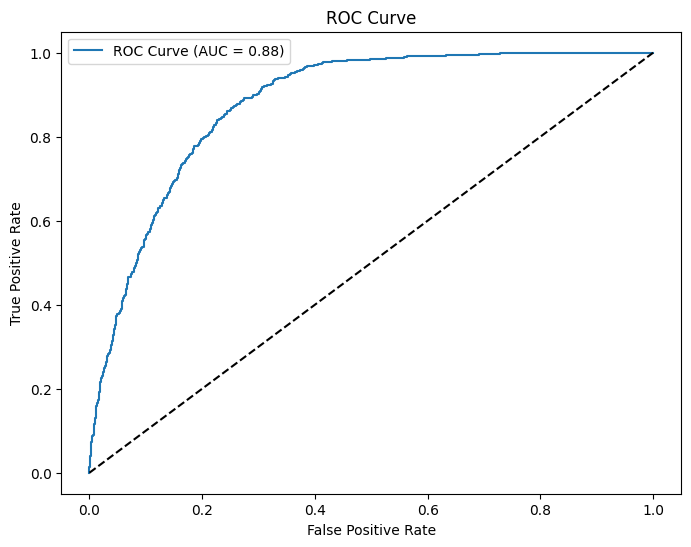

Cross-Validation AUC Scores: [0.87708873 0.8785945  0.87684461 0.8696696  0.87780018]
Mean CV AUC Score: 0.8759995251998676


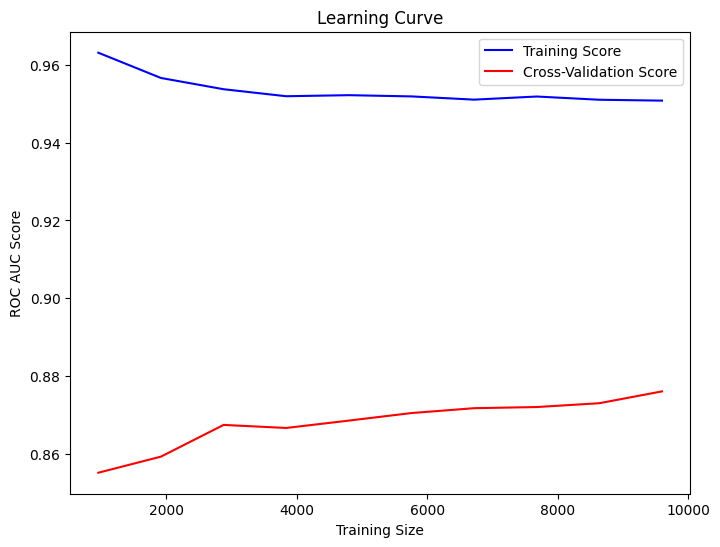

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import optuna

# Ma'lumotlarni ajratish
X = df.drop('smoking', axis=1)
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optuna tuning funksiyasi
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    y_prob = rf_model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    return auc_score  

# Optuna orqali tuning
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
best_params = study.best_params
print("Best parameters:", best_params)
print("Best AUC:", study.best_value)

# Eng yaxshi parametrlar bilan model
rf_model = RandomForestClassifier(**best_params, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('dt', dt_model)],
    voting='soft'
)

# Modelni o'rgatish va baholash
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
y_prob = voting_clf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("ROC AUC Score:", auc_score)

# ROC chizig'ini chizish
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Kross-validatsiya (CV) ko'rsatkichlari
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation AUC Scores:", cv_scores)
print("Mean CV AUC Score:", cv_scores.mean())

# O'quv egri chizig'i
train_sizes, train_scores, test_scores = learning_curve(
    voting_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='b')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='r')
plt.xlabel('Training Size')
plt.ylabel('ROC AUC Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

# Final bashoratlar va CSV fayl yaratish
y_test_prob = voting_clf.predict_proba(df_test)[:, 1]
subm = pd.read_csv("sample_submission.csv")
subm['smoking'] = y_test_prob
subm.to_csv("8_submission.csv", index=False)


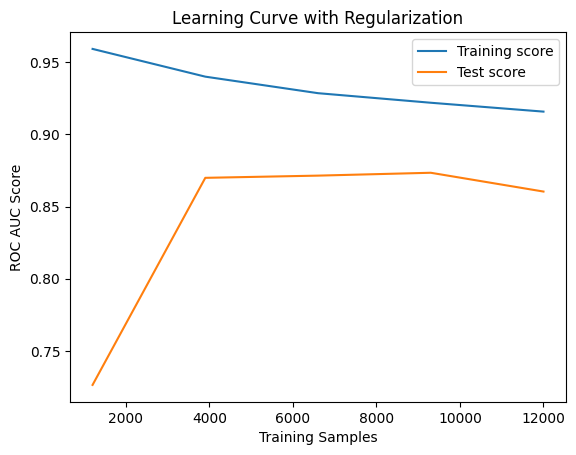

In [8]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import optuna

# Regularized model parameters
rf_params = {
    'n_estimators': 100,
    'max_depth': 10,  # Lowered to prevent overfitting
    'min_samples_split': 5,  # Increased for regularization
    'min_samples_leaf': 4,  # Increased to reduce variance
    'random_state': 42
}

dt_params = {
    'max_depth': 5,  # Lowered max depth
    'min_samples_split': 5,  # Increased for regularization
    'random_state': 42
}

# Initialize models with regularization
rf_model = RandomForestClassifier(**rf_params)
dt_model = DecisionTreeClassifier(**dt_params)

# Voting classifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('dt', dt_model)],
    voting='soft'
)

# Fit and learning curve
train_sizes, train_scores, test_scores = learning_curve(voting_clf, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plotting learning curves
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.xlabel('Training Samples')
plt.ylabel('ROC AUC Score')
plt.legend()
plt.title('Learning Curve with Regularization')
plt.show()


[I 2024-10-25 18:53:54,415] A new study created in memory with name: no-name-60fe8df3-899f-4a17-8d50-0e94346abca5


[I 2024-10-25 18:54:01,775] Trial 0 finished with value: 0.8810537576772418 and parameters: {'n_estimators': 70, 'max_depth': 25, 'min_samples_split': 12, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.8810537576772418.
[I 2024-10-25 18:54:14,258] Trial 1 finished with value: 0.8801555194395567 and parameters: {'n_estimators': 128, 'max_depth': 29, 'min_samples_split': 12, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.8810537576772418.
[I 2024-10-25 18:54:21,566] Trial 2 finished with value: 0.8776060816223235 and parameters: {'n_estimators': 95, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8810537576772418.
[I 2024-10-25 18:54:44,115] Trial 3 finished with value: 0.8798186801004247 and parameters: {'n_estimators': 235, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.8810537576772418.
[I 2024-10-25 18:55:07,156] Trial 4 finished with value: 0.8821132487900435 and parameter

Best parameters found by Optuna: {'n_estimators': 291, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 9}


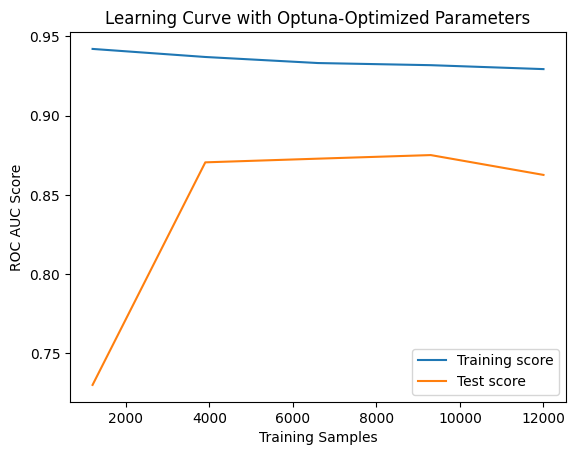

In [10]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import optuna

# Feature va target ustunlarini ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optuna optimization function
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    score = np.mean(cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc'))
    return score

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Get best params and print
best_rf_params = study.best_params
print("Best parameters found by Optuna:", best_rf_params)

# Apply best params to RF model
rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

# Voting classifier with best RF model
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('dt', dt_model)],
    voting='soft'
)

# Fit and plot learning curve
train_sizes, train_scores, test_scores = learning_curve(voting_clf, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.xlabel('Training Samples')
plt.ylabel('ROC AUC Score')
plt.legend()
plt.title('Learning Curve with Optuna-Optimized Parameters')
plt.show()


In [17]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


# Using best parameters from Optuna's optimization
best_rfparams = {
    'n_estimators': best_rf_params['n_estimators'],
    'max_depth': best_rf_params['max_depth'],
    'min_samples_split': best_rf_params['min_samples_split'],
    'min_samples_leaf': best_rf_params['min_samples_leaf'],
    'random_state': 42
}

# Initialize models with best parameters
rf_model = RandomForestClassifier(**best_rf_params)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Adjusted as per the original setup

# Voting classifier
voting_clf_best = VotingClassifier(
    estimators=[('rf', rf_model), ('dt', dt_model)],
    voting='soft'
)

# Fit the final model
voting_clf_best.fit(X_train, y_train)

# Predict and calculate metrics
y_pred = voting_clf_best.predict(X_test)
y_prob = voting_clf_best.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("Final Model Accuracy:", accuracy)
print("Final Model ROC AUC Score:", auc_score)


y_test_prob = voting_clf_best.predict_proba(df_test)[:, 1]
subm = pd.read_csv("sample_submission.csv")
subm['smoking'] = y_test_prob
subm.to_csv("8_urunish.csv", index=False)


Final Model Accuracy: 0.7986666666666666
Final Model ROC AUC Score: 0.8779004098492916


In [6]:
X = df.drop('smoking', axis=1)  
y = df['smoking']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

# Using best parameters from Optuna's optimization
best_rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'random_state': 42
}

# Initialize models with best parameters
rf_model = RandomForestClassifier(**best_rf_params)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Voting classifier
voting_clf_best = VotingClassifier(
    estimators=[('rf', rf_model), ('dt', dt_model)],
    voting='soft'
)

# Cross-validation for accuracy and ROC AUC scores
cv_accuracy = cross_val_score(voting_clf_best, X_train, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(voting_clf_best, X_train, y_train, cv=5, scoring='roc_auc')

print("Cross-validated Accuracy Scores:", cv_accuracy)
print("Mean CV Accuracy:", cv_accuracy.mean())
print("Cross-validated ROC AUC Scores:", cv_roc_auc)
print("Mean CV ROC AUC:", cv_roc_auc.mean())

# Fit the final model and predict
voting_clf_best.fit(X_train, y_train)
y_pred = voting_clf_best.predict(X_test)
y_prob = voting_clf_best.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("Final Model Accuracy:", accuracy)
print("Final Model ROC AUC Score:", auc_score)

# Prediction on test data for submission
y_test_prob = voting_clf_best.predict_proba(df_test)[:, 1]
subm = pd.read_csv("sample_submission.csv")
subm['smoking'] = y_test_prob
subm.to_csv("9_urunish.csv", index=False)


Cross-validated Accuracy Scores: [0.79       0.79416667 0.78625    0.77708333 0.78375   ]
Mean CV Accuracy: 0.78625
Cross-validated ROC AUC Scores: [0.8768573  0.87660796 0.87545306 0.86902907 0.87473339]
Mean CV ROC AUC: 0.8745361553581865
Final Model Accuracy: 0.792
Final Model ROC AUC Score: 0.8756803137558634
